# L18.10: SVM in sklearn

## Very basic example

In [1]:
from sklearn import svm
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = svm.SVC()
clf.fit(X, y)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [2]:
clf.predict([[2., 2.]])

array([1])

## Udacity example

clf = SVC(kernel="linear", gamma=1.0, C=1.0)

C param: controls the tradeoff between smooth decision boundary and classifying points correctly
    - 1 by default
    - higher: more complex models. Risk to overfit also
    
gamma param: decision boundary mainly affected by nearby (to the decision boundary) points or farther/all points
    - higher: lot of weight forpoints close to decision boundary. More complex deciion boundary. Risk to overfit
    - lower: even the far away points get taken into consideration when deciding the decision boundary

kernel param: linear, rbf, polynomial, sigmoid ...

In [17]:
import sys
from class_vis import prettyPicture
from prep_terrain_data import makeTerrainData

import matplotlib.pyplot as plt
import copy
import numpy as np
import pylab as pl


features_train, labels_train, features_test, labels_test = makeTerrainData()

########################## SVM #################################
### we handle the import statement and SVC creation for you here
from sklearn.svm import SVC
clf = SVC(kernel="linear", gamma=1.0)
#clf = SVC(kernel="rbf", gamma=1000.0, C=10.0)


#### now your job is to fit the classifier
#### using the training features/labels, and to
#### make a set of predictions on the test data
clf.fit(features_train, labels_train)

#### store your predictions in a list named pred
pred = clf.predict(features_test)


from sklearn.metrics import accuracy_score
acc = accuracy_score(pred, labels_test)

print(acc)

0.92


BEGIN_IMAGE_f9825uweof8jw9fj4r8{"name": "test.png", "bytes": "iVBORw0KGgoAAAANSUhEUgAAAlgAAAGQCAYAAAByNR6YAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz\nAAAPYQAAD2EBqD+naQAAIABJREFUeJzs3XmcFNW9///XDIszMFHAwUFQWWYw4hKRURYN/iTwZUkU\nTUQUMQbjgssFFdQbNRchfs2NBEUjKGrcEgGNoH5jDItgrgJxQRBv3FmVBJkwIiggIjP1+6Onh+6e\n3ruWU1Xv5+Mxj4Hq7XR1T9e7zzn1OUWWZVmIiIiIiG2KvW6AiIiISNAoYImIiIjYTAFLRERExGYK\nWCIiIiI2U8ASERERsZkCloiIiIjNFLBEREREbKaAJSIiImIzBSwRERERmylgiYiIiNhMAUtERETE\nZgpYIiIiIjZTwBIRERGxmQKWiIiIiM0UsERERERspoAlIiIiYjMFLBERERGbKWCJiIiI2EwBS0RE\nRMRmClgiIiIiNlPAEhEREbGZApaIiIiIzRSwRERERGymgCUiIiJiMwUsEREREZspYImIiIjYTAFL\nRERExGYKWCIiIiI2U8ASERERsZkCloiIiIjNFLBEREREbKaAJSIiImIzBSwRERERmylgiYiIiNhM\nAUtERETEZgpYIiIiIjZTwBIRERGxmQKWiIiIiM2ae90Av6itrWXRokV06dKF0tJSr5sjIiLiG19/\n/TWbNm1iyJAhlJeXe90cVyhgZWnRokVcdNFFXjdDRETEt5588klGjx7tdTNcoYCVpS5dugDwEyAc\n2dscC4GhXjcihLTfvWHyfj8EuCDN5X8B/mXTYx0EDASOjNm2GVgKfGPTY8TKdb//EOhE/DybeiLP\n/69Z3ofbz7FQyZ5zMp8Bf07YVgs8y4FjaRgoYGUpOixYDnT0timhU4L2uRe0371h+n4/GOhG8oNs\nL2

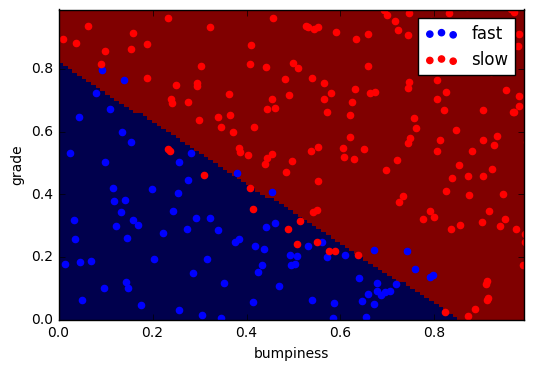

In [18]:
%matplotlib inline
from class_vis import prettyPicture, output_image
### draw the decision boundary with the text points overlaid
prettyPicture(clf, features_test, labels_test)
output_image("test.png", "png", open("test.png", "rb").read())

SVM ++:
    - work really well in complicated domains where there is a clear margin of separation
    
SVM --:
    - they do not perform so well in very large datasets bcz the training time is cubic to the dataset
    - they do not work well with lots of noise
    - when classes are overlapping you have to count independent evidence: Naive Bayes classifiers are better
 
Big data sets, lots of features: SVM may be very slow and prone to overfitting to some of the noise in your data